In [11]:
import numpy as np
x = np.array([2,3])
y = np.expand_dims(x, axis=(-1))
y

array([[2],
       [3]])

Epoch 1/10
1875/1875 [==============================] - 40s 19ms/step - loss: 0.1528 - accuracy: 0.9527 - val_loss: 0.0439 - val_accuracy: 0.9859
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0485 - val_accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0343 - val_accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0263 - accuracy: 0.9918 - val_loss: 0.0288 - val_accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0343 - val_accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0318 - val_accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0288 -

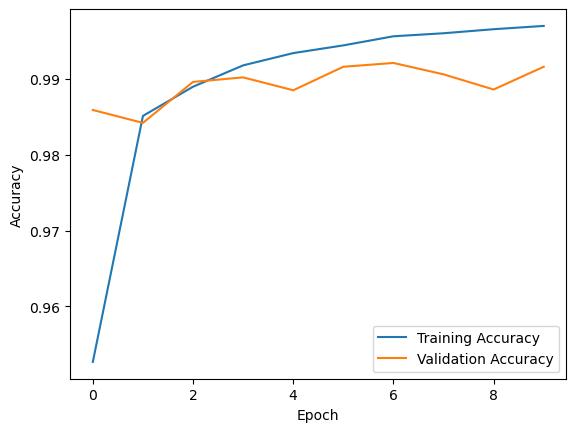

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension to the images (required for CNN input)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [4]:
# Import QRCode from pyqrcode
import pyqrcode
import png
from pyqrcode import QRCode


# String which represents the QR code
s = "https://github.com/suswit/pythoncode"

# Generate QR code
url = pyqrcode.create(s)

# Create and save the svg file naming "myqr.svg"
url.svg("myqr.svg", scale = 8)

# Create and save the png file naming "myqr.png"
url.png('myqr.png', scale = 6)
